### 직류 RC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint

In [2]:
# ODE
V = 5
R = 10e3
C = 220e-6
def dq_dt(q, t):
    return V/R - q/(R*C)

In [3]:
t = np.linspace(0,15,1500)
sol = odeint(dq_dt, 0, t)
V_c = sol/C

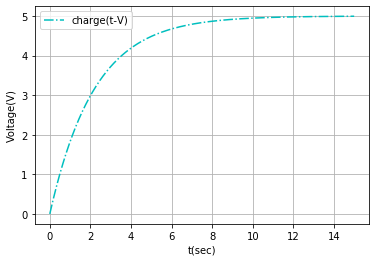

In [4]:
fig, ax = plt.subplots()
ax.plot(t, V_c, 'c-.', label='charge(t-V)')
ax.grid()
ax.set_xlabel('t(sec)')
ax.set_ylabel('Voltage(V)')
ax.legend()
plt.show()

#### 1 tau(67%)충전 표기

In [5]:
#데이터 reshape
t = np.reshape(t, (1500, 1))
V_c = np.reshape(V_c, (1500, 1))

In [6]:
#t-V_C  2열 데이터 생성
V_t = np.concatenate((t,V_c), axis=1)

In [7]:
#1tau 조건 indexing
V_1tau = V_t[:,1][np.where(V_t[:,0]< R*C)]
t_1tau = V_t[:,0][np.where(V_t[:,0]< R*C)]

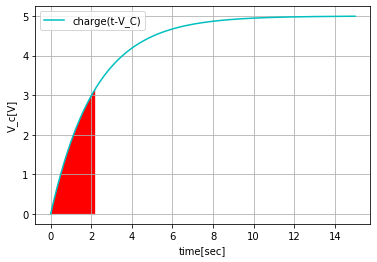

In [8]:
#1tau(67%)충전 plotting
fig, ax = plt.subplots()
ax.plot(t, V_c, 'c-', label='charge(t-V_C)')
ax.fill_between(t_1tau, V_1tau, facecolor='r')
ax.grid()
ax.set_xlabel('time[sec]')
ax.set_ylabel('V_c[V]')
ax.legend()
plt.show()